In [0]:
import pickle
import csv
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D
from keras.layers import Flatten, Dense
from keras.layers.normalization import BatchNormalization
from keras.callbacks import ModelCheckpoint, History
from keras.optimizers import Adam

In [0]:
unpickled_df = pd.read_pickle("/300W_train_160by160.pickle")
print("done")
#unpickled_df2 = pd.read_pickle("/Users/jinqilin/Downloads/300W_test_160by160.pickle")

X_train0 = unpickled_df['X']
print("what")
print(X_train0.shape)
Y_train0 = unpickled_df['Y']['kpt_norm']
print(Y_train0.shape)
print("whahh")

done
what
(3148, 160, 160, 3)
(3148, 136)
whahh


In [0]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.33, 0.33, 0.33])
X_train1 = rgb2gray(X_train0)
X_train = np.zeros((3148,160,160,1))
X_train[:,:,:,0] = X_train1[:,:,:]

Y_train = np.zeros((3148,28))
for i in range(14):
    Y_train[:,2*i] = Y_train0[:,4*i]
    Y_train[:,2*i+1] = Y_train0[:,4*i+1]

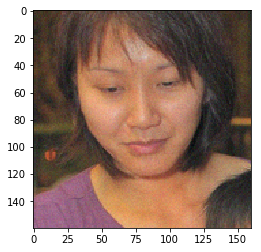

In [0]:
temp1 = X_train0.copy()

test = temp1[0]
temp = np.zeros((160,160))
temp[:,:] = test[:,:,2]
test[:,:,2] = test[:,:,0]
test[:,:,0] = temp
plt.imshow(test)

noise = np.random.randint(20, size = (160,160, 3), dtype = 'uint8')

for i in range(160):
  for j in range(160):
       for k in range(3):
          if (test[i,j,k] != 255):
               test[i,j,k] += noise[i,j,k]

plt.imshow(test)
plt.show()


In [0]:
#augmentation: noisy
temp1 = X_train0.copy()
for i in range(3148):
  noise = np.random.randint(20, size = (160,160, 3), dtype = 'uint8')

  temp = temp1[i]
  
  for i in range(160):
    for j in range(160):
       for k in range(3):
          if (temp[i,j,k] < 235):
               temp[i,j,k] += noise[i,j,k]
              
plt.imshow(temp1[10])
plt.show()

KeyboardInterrupt: ignored

In [0]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=(160, 160,3)))

model.add(Conv2D(filters=16, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))

model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))

model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))

model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))

model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())

model.add(Dense(512, activation='relu',kernel_initializer='glorot_normal'))

model.add(Dense(512, activation='relu',kernel_initializer='glorot_normal'))

model.add(Dense(256, activation='relu',kernel_initializer='glorot_normal'))

model.add(Dense(256, activation='relu',kernel_initializer='glorot_normal'))

model.add(Dense(512, activation='relu',kernel_initializer='glorot_normal'))

model.add(Dense(256, activation='relu',kernel_initializer='glorot_normal'))

model.add(Dense(256, activation='relu',kernel_initializer='glorot_normal'))

model.add(Dense(512, activation='relu',kernel_initializer='glorot_normal'))

model.add(Dense(136))


# Summarize the model
model.summary()

hist = History()
epochs = 80
batch_size = 64

#sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)

checkpointer = ModelCheckpoint(filepath='weights.final_2.hdf5', 
                               verbose=1, save_best_only=True)

## TODO: Compile the model
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=adam, loss='mean_absolute_percentage_error', metrics=['accuracy'])

hist_final = model.fit(X_train0, Y_train0, validation_split=0.2,
          epochs=epochs, batch_size=batch_size, callbacks=[checkpointer, hist,tbCallBack], verbose=1)


model.save('my_model_final33.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_158 (Conv2D)          (None, 158, 158, 16)      448       
_________________________________________________________________
conv2d_159 (Conv2D)          (None, 156, 156, 16)      2320      
_________________________________________________________________
max_pooling2d_80 (MaxPooling (None, 78, 78, 16)        0         
_________________________________________________________________
conv2d_160 (Conv2D)          (None, 76, 76, 32)        4640      
_________________________________________________________________
conv2d_161 (Conv2D)          (None, 74, 74, 32)        9248      
_________________________________________________________________
max_pooling2d_81 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_162 (Conv2D)          (None, 35, 35, 64)        18496     
__________

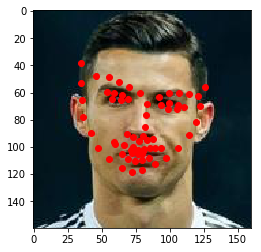

In [0]:
img=plt.imread("/content/ro160.jpg")
im = np.zeros((1,160,160,3))
im[0,:,:,:] = img[:]
points = model.predict(im)
plt.imshow(img)
for i in range(int(len(points[0])/2)):
    plt.plot(points[0][2*i]*160,points[0][2*i+1]*160,'ro')

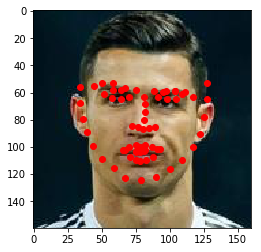

In [0]:
from keras.models import load_model
img=plt.imread("/content/ro160.jpg")
im = np.zeros((1,160,160,3))
im[0,:,:,:] = img[:]
model1 = load_model('my_model_final.h5')
model2 = load_model('my_model_final2.h5')
model3 = load_model('my_model_final3.h5')
model4 = load_model('my_model_final4.h5')
point1 = model1.predict(im)
point2 = model2.predict(im)
point3 = model3.predict(im)
point4 = model4.predict(im)
plt.imshow(img)
for i in range(int(len(point1[0])/2)):
    plt.plot(point1[0][2*i]*160,point1[0][2*i+1]*160,'ro')
for i in range(int(len(point2[0])/2)):
    plt.plot(point2[0][2*i]*160,point2[0][2*i+1]*160,'ro')
for i in range(int(len(point3[0])/2)):
    plt.plot(point3[0][2*i]*160,point3[0][2*i+1]*160,'ro')
for i in range(int(len(point4[0])/2)):
    plt.plot(point4[0][2*i]*160,point4[0][2*i+1]*160,'ro')

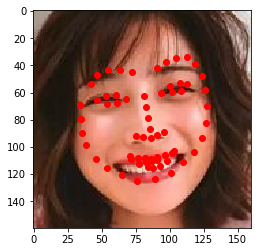

In [0]:
img=plt.imread("/content/10160.jpg")
im = np.zeros((1,160,160,3))
im[0,:,:,:] = img[:]
point1 = model1.predict(im)
point2 = model2.predict(im)
point3 = model3.predict(im)
point4 = model4.predict(im)
plt.imshow(img)
for i in range(int(len(point1[0])/2)):
    plt.plot(point1[0][2*i]*160,point1[0][2*i+1]*160,'ro')
for i in range(int(len(point2[0])/2)):
    plt.plot(point2[0][2*i]*160,point2[0][2*i+1]*160,'ro')
for i in range(int(len(point3[0])/2)):
    plt.plot(point3[0][2*i]*160,point3[0][2*i+1]*160,'ro')
for i in range(int(len(point4[0])/2)):
    plt.plot(point4[0][2*i]*160,point4[0][2*i+1]*160,'ro')

In [0]:
model = Sequential()
model.add(Conv2D(filters=96, kernel_size=11, activation='relu', input_shape=(160, 160,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

model.add(Conv2D(filters=256, kernel_size=11, strides=(1,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

model.add(Conv2D(filters=384, kernel_size=11, activation='relu'))

model.add(Conv2D(filters=384, kernel_size=11, activation='relu'))

model.add(Conv2D(filters=256, kernel_size=11, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

model.add(Flatten())

model.add(Dense(4096, activation='relu',kernel_initializer='glorot_normal'))
model.add(Dropout(0.4))

model.add(Dense(4096, activation='relu',kernel_initializer='glorot_normal'))
model.add(Dropout(0.4))

model.add(Dense(1000, activation='relu',kernel_initializer='glorot_normal'))
model.add(Dropout(0.4))

model.add(Dense(136, activation='softmax'))


model.summary()



hist = History()
epochs = 150
batch_size = 64

#sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)

checkpointer = ModelCheckpoint(filepath='weights.final_2.hdf5', 
                               verbose=1, save_best_only=True)

## TODO: Compile the model
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=adam, loss='mean_absolute_percentage_error', metrics=['accuracy'])

hist_final = model.fit(X_train0, Y_train0, validation_split=0.2,
          epochs=epochs, batch_size=batch_size, callbacks=[checkpointer, hist,tbCallBack], verbose=1)



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 150, 150, 96)      34944     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 75, 75, 96)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 65, 65, 256)       2973952   
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 32, 32, 256)       0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 22, 22, 384)       11895168  
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 12, 12, 384)       17842560  
___________________________

KeyboardInterrupt: ignored

In [0]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=(160, 160,3)))

model.add(Conv2D(filters=16, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))

model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))

model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))

model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())

model.add(Dense(512, activation='relu',kernel_initializer='glorot_normal'))

model.add(Dense(512, activation='relu',kernel_initializer='glorot_normal'))

model.add(Dense(256, activation='relu',kernel_initializer='glorot_normal'))

model.add(Dense(256, activation='relu',kernel_initializer='glorot_normal'))

model.add(Dense(512, activation='relu',kernel_initializer='glorot_normal'))

model.add(Dense(136))


# Summarize the model
model.summary()

hist = History()
epochs = 150
batch_size = 64

#sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)

checkpointer = ModelCheckpoint(filepath='weights.final_2.hdf5', 
                               verbose=1, save_best_only=True)

## TODO: Compile the model
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=adam, loss='mean_absolute_percentage_error', metrics=['accuracy'])

hist_final = model.fit(X_train0, Y_train0, validation_split=0.2,
          epochs=epochs, batch_size=batch_size, callbacks=[checkpointer, hist,tbCallBack], verbose=1)


model.save('my_model_final.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_84 (Conv2D)           (None, 158, 158, 16)      448       
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 156, 156, 16)      2320      
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 78, 78, 16)        0         
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 76, 76, 32)        4640      
_________________________________________________________________
conv2d_87 (Conv2D)           (None, 74, 74, 32)        9248      
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_88 (Conv2D)           (None, 35, 35, 64)        18496     
__________

In [0]:
Y_train1 = np.zeros((3148,34))
Y_train2 = np.zeros((3148,20))
Y_train3 = np.zeros((3148,42))
Y_train4 = np.zeros((3148,40))
for i in range(34):
    Y_train1[:,i] = Y_train0[:,i]
for i in range(20):
    Y_train2[:,i] = Y_train0[:,34+i]
for i in range(42):
    Y_train3[:,i] = Y_train0[:,54+i]
for i in range(40):
    Y_train4[:,i] = Y_train0[:,96+i]


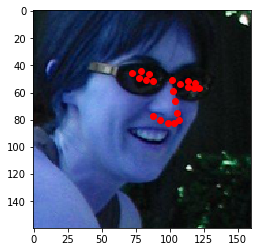

In [0]:
img = X_train0[5]
plt.imshow(img)
for i in range(21):
    plt.plot(Y_train3[5][2*i]*160,Y_train3[5][2*i+1]*160,'ro')   

In [0]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=(160, 160,3)))

model.add(Conv2D(filters=16, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))

model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))

model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))

model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))

model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())

model.add(Dense(512, activation='relu',kernel_initializer='glorot_normal'))

model.add(Dense(512, activation='relu',kernel_initializer='glorot_normal'))

model.add(Dense(256, activation='relu',kernel_initializer='glorot_normal'))

model.add(Dense(256, activation='relu',kernel_initializer='glorot_normal'))

model.add(Dense(256, activation='relu',kernel_initializer='glorot_normal'))

model.add(Dense(512, activation='relu',kernel_initializer='glorot_normal'))

model.add(Dense(20))


# Summarize the model
model.summary()

hist = History()
epochs = 150
batch_size = 64

#sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)

checkpointer = ModelCheckpoint(filepath='weights.final_2.hdf5', 
                               verbose=1, save_best_only=True)

## TODO: Compile the model
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=adam, loss='mean_absolute_percentage_error', metrics=['accuracy'])

hist_final = model.fit(X_train0, Y_train2, validation_split=0.2,
          epochs=epochs, batch_size=batch_size, callbacks=[checkpointer, hist,tbCallBack], verbose=1)


model.save('my_model_final.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_128 (Conv2D)          (None, 158, 158, 16)      448       
_________________________________________________________________
conv2d_129 (Conv2D)          (None, 156, 156, 16)      2320      
_________________________________________________________________
max_pooling2d_65 (MaxPooling (None, 78, 78, 16)        0         
_________________________________________________________________
conv2d_130 (Conv2D)          (None, 76, 76, 32)        4640      
_________________________________________________________________
conv2d_131 (Conv2D)          (None, 74, 74, 32)        9248      
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_132 (Conv2D)          (None, 35, 35, 64)        18496     
__________

In [0]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=(160, 160,3)))

model.add(Conv2D(filters=16, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))

model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))

model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))

model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))

model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())

model.add(Dense(512, activation='relu',kernel_initializer='glorot_normal'))

model.add(Dense(512, activation='relu',kernel_initializer='glorot_normal'))

model.add(Dense(256, activation='relu',kernel_initializer='glorot_normal'))

model.add(Dense(256, activation='relu',kernel_initializer='glorot_normal'))

model.add(Dense(256, activation='relu',kernel_initializer='glorot_normal'))

model.add(Dense(512, activation='relu',kernel_initializer='glorot_normal'))

model.add(Dense(42))


# Summarize the model
model.summary()

hist = History()
epochs = 150
batch_size = 64

#sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)

checkpointer = ModelCheckpoint(filepath='weights.final_2.hdf5', 
                               verbose=1, save_best_only=True)

## TODO: Compile the model
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=adam, loss='mean_absolute_percentage_error', metrics=['accuracy'])

hist_final = model.fit(X_train0, Y_train3, validation_split=0.2,
          epochs=epochs, batch_size=batch_size, callbacks=[checkpointer, hist,tbCallBack], verbose=1)


model.save('my_model_final2.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_138 (Conv2D)          (None, 158, 158, 16)      448       
_________________________________________________________________
conv2d_139 (Conv2D)          (None, 156, 156, 16)      2320      
_________________________________________________________________
max_pooling2d_70 (MaxPooling (None, 78, 78, 16)        0         
_________________________________________________________________
conv2d_140 (Conv2D)          (None, 76, 76, 32)        4640      
_________________________________________________________________
conv2d_141 (Conv2D)          (None, 74, 74, 32)        9248      
_________________________________________________________________
max_pooling2d_71 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_142 (Conv2D)          (None, 35, 35, 64)        18496     
__________

IndexError: ignored

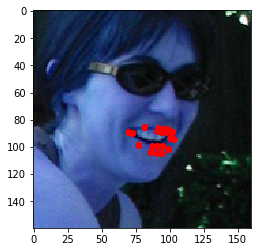

In [0]:
img = X_train0[5]
plt.imshow(img)
for i in range(40):
    plt.plot(Y_train4[5][2*i]*160,Y_train4[5][2*i+1]*160,'ro')   

In [0]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=(160, 160,3)))

model.add(Conv2D(filters=16, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))

model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))

model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))

model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))

model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())

model.add(Dense(512, activation='relu',kernel_initializer='glorot_normal'))

model.add(Dense(512, activation='relu',kernel_initializer='glorot_normal'))

model.add(Dense(256, activation='relu',kernel_initializer='glorot_normal'))

model.add(Dense(256, activation='relu',kernel_initializer='glorot_normal'))

model.add(Dense(256, activation='relu',kernel_initializer='glorot_normal'))

model.add(Dense(512, activation='relu',kernel_initializer='glorot_normal'))

model.add(Dense(40))


# Summarize the model
model.summary()

hist = History()
epochs = 150
batch_size = 64

#sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)

checkpointer = ModelCheckpoint(filepath='weights.final_2.hdf5', 
                               verbose=1, save_best_only=True)

## TODO: Compile the model
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=adam, loss='mean_absolute_percentage_error', metrics=['accuracy'])

hist_final = model.fit(X_train0, Y_train4, validation_split=0.2,
          epochs=epochs, batch_size=batch_size, callbacks=[checkpointer, hist,tbCallBack], verbose=1)


model.save('my_model_final3.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_148 (Conv2D)          (None, 158, 158, 16)      448       
_________________________________________________________________
conv2d_149 (Conv2D)          (None, 156, 156, 16)      2320      
_________________________________________________________________
max_pooling2d_75 (MaxPooling (None, 78, 78, 16)        0         
_________________________________________________________________
conv2d_150 (Conv2D)          (None, 76, 76, 32)        4640      
_________________________________________________________________
conv2d_151 (Conv2D)          (None, 74, 74, 32)        9248      
_________________________________________________________________
max_pooling2d_76 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_152 (Conv2D)          (None, 35, 35, 64)        18496     
__________

In [0]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=(160, 160,3)))

model.add(Conv2D(filters=16, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))

model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))

model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))

model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))

model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())

model.add(Dense(512, activation='relu',kernel_initializer='glorot_normal'))

model.add(Dense(512, activation='relu',kernel_initializer='glorot_normal'))

model.add(Dense(256, activation='relu',kernel_initializer='glorot_normal'))

model.add(Dense(256, activation='relu',kernel_initializer='glorot_normal'))

model.add(Dense(256, activation='relu',kernel_initializer='glorot_normal'))

model.add(Dense(512, activation='relu',kernel_initializer='glorot_normal'))

model.add(Dense(34))


# Summarize the model
model.summary()

hist = History()
epochs = 80
batch_size = 64

#sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)

checkpointer = ModelCheckpoint(filepath='weights.final_2.hdf5', 
                               verbose=1, save_best_only=True)

## TODO: Compile the model
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=adam, loss='mean_absolute_percentage_error', metrics=['accuracy'])

hist_final = model.fit(X_train0, Y_train1, validation_split=0.2,
          epochs=epochs, batch_size=batch_size, callbacks=[checkpointer, hist,tbCallBack], verbose=1)


model.save('my_model_final4.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_178 (Conv2D)          (None, 158, 158, 16)      448       
_________________________________________________________________
conv2d_179 (Conv2D)          (None, 156, 156, 16)      2320      
_________________________________________________________________
max_pooling2d_90 (MaxPooling (None, 78, 78, 16)        0         
_________________________________________________________________
conv2d_180 (Conv2D)          (None, 76, 76, 32)        4640      
_________________________________________________________________
conv2d_181 (Conv2D)          (None, 74, 74, 32)        9248      
_________________________________________________________________
max_pooling2d_91 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_182 (Conv2D)          (None, 35, 35, 64)        18496     
__________